In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
Data=pd.read_excel('KPMG_VI_New_raw_data_update_final (1).xlsx',sheet_name='NewCustomerList', skiprows=1)

In [125]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [126]:
Data.drop(Data.columns[Data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [127]:
Data.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1000.000000,1.718750


In [128]:

Data.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [129]:
Data["last_name"]= Data["last_name"].fillna(method='ffill')
Data["DOB"]=Data["DOB"].fillna(method="bfill")
Data["job_title"]= Data["job_title"].fillna(method='ffill')
Data["job_industry_category"]= Data["job_industry_category"].fillna(method='ffill')

In [130]:
Data.isnull().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
dtype: int64

In [131]:
Data.dtypes


first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                          int64
address                                        object
postcode                                        int64
state                                          object
country                                        object
property_valuation                              int64
Rank                                            int64
Value                                         float64
dtype: object

In [147]:

Data["Age"]= 2021- Data["DOB"].dt.year

<AxesSubplot:xlabel='Age'>

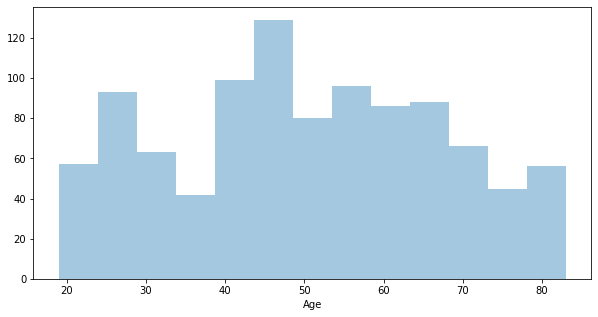

In [153]:
plt.figure(figsize=(10,5))
sns.distplot(Data['Age'],kde=False)

<AxesSubplot:xlabel='gender', ylabel='past_3_years_bike_related_purchases'>

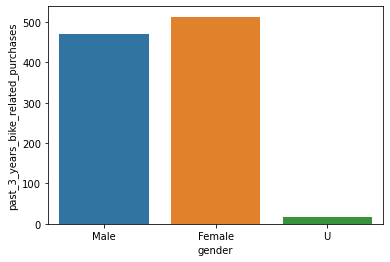

In [134]:
sns.barplot(x='gender', y='past_3_years_bike_related_purchases',data=Data,estimator=len)

<AxesSubplot:ylabel='past_3_years_bike_related_purchases'>

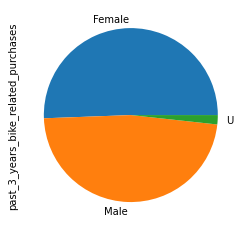

In [135]:
dataa = Data.groupby("gender")['past_3_years_bike_related_purchases'].sum()
dataa.plot.pie()

<AxesSubplot:xlabel='state', ylabel='count'>

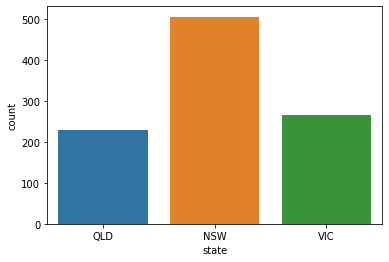

In [136]:
sns.countplot(x='state',data=Data)

<AxesSubplot:xlabel='country', ylabel='count'>

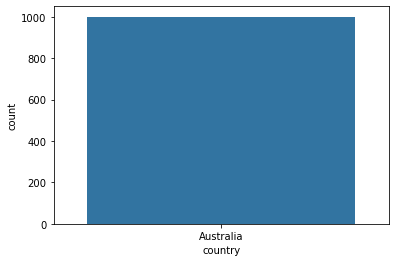

In [137]:
sns.countplot(x='country',data=Data)

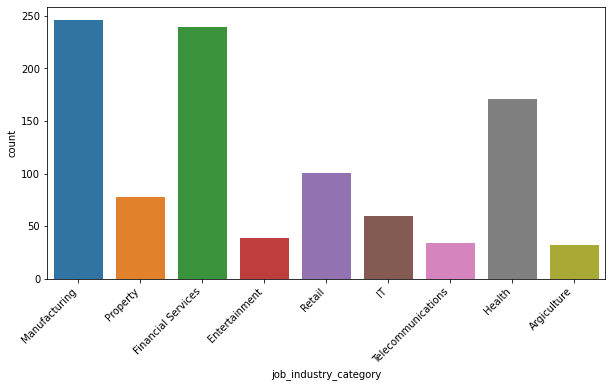

In [138]:
plt.figure(figsize=(10,5))

chart=sns.countplot(x='job_industry_category',data=Data)
chart.set_xticklabels(chart.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.show()

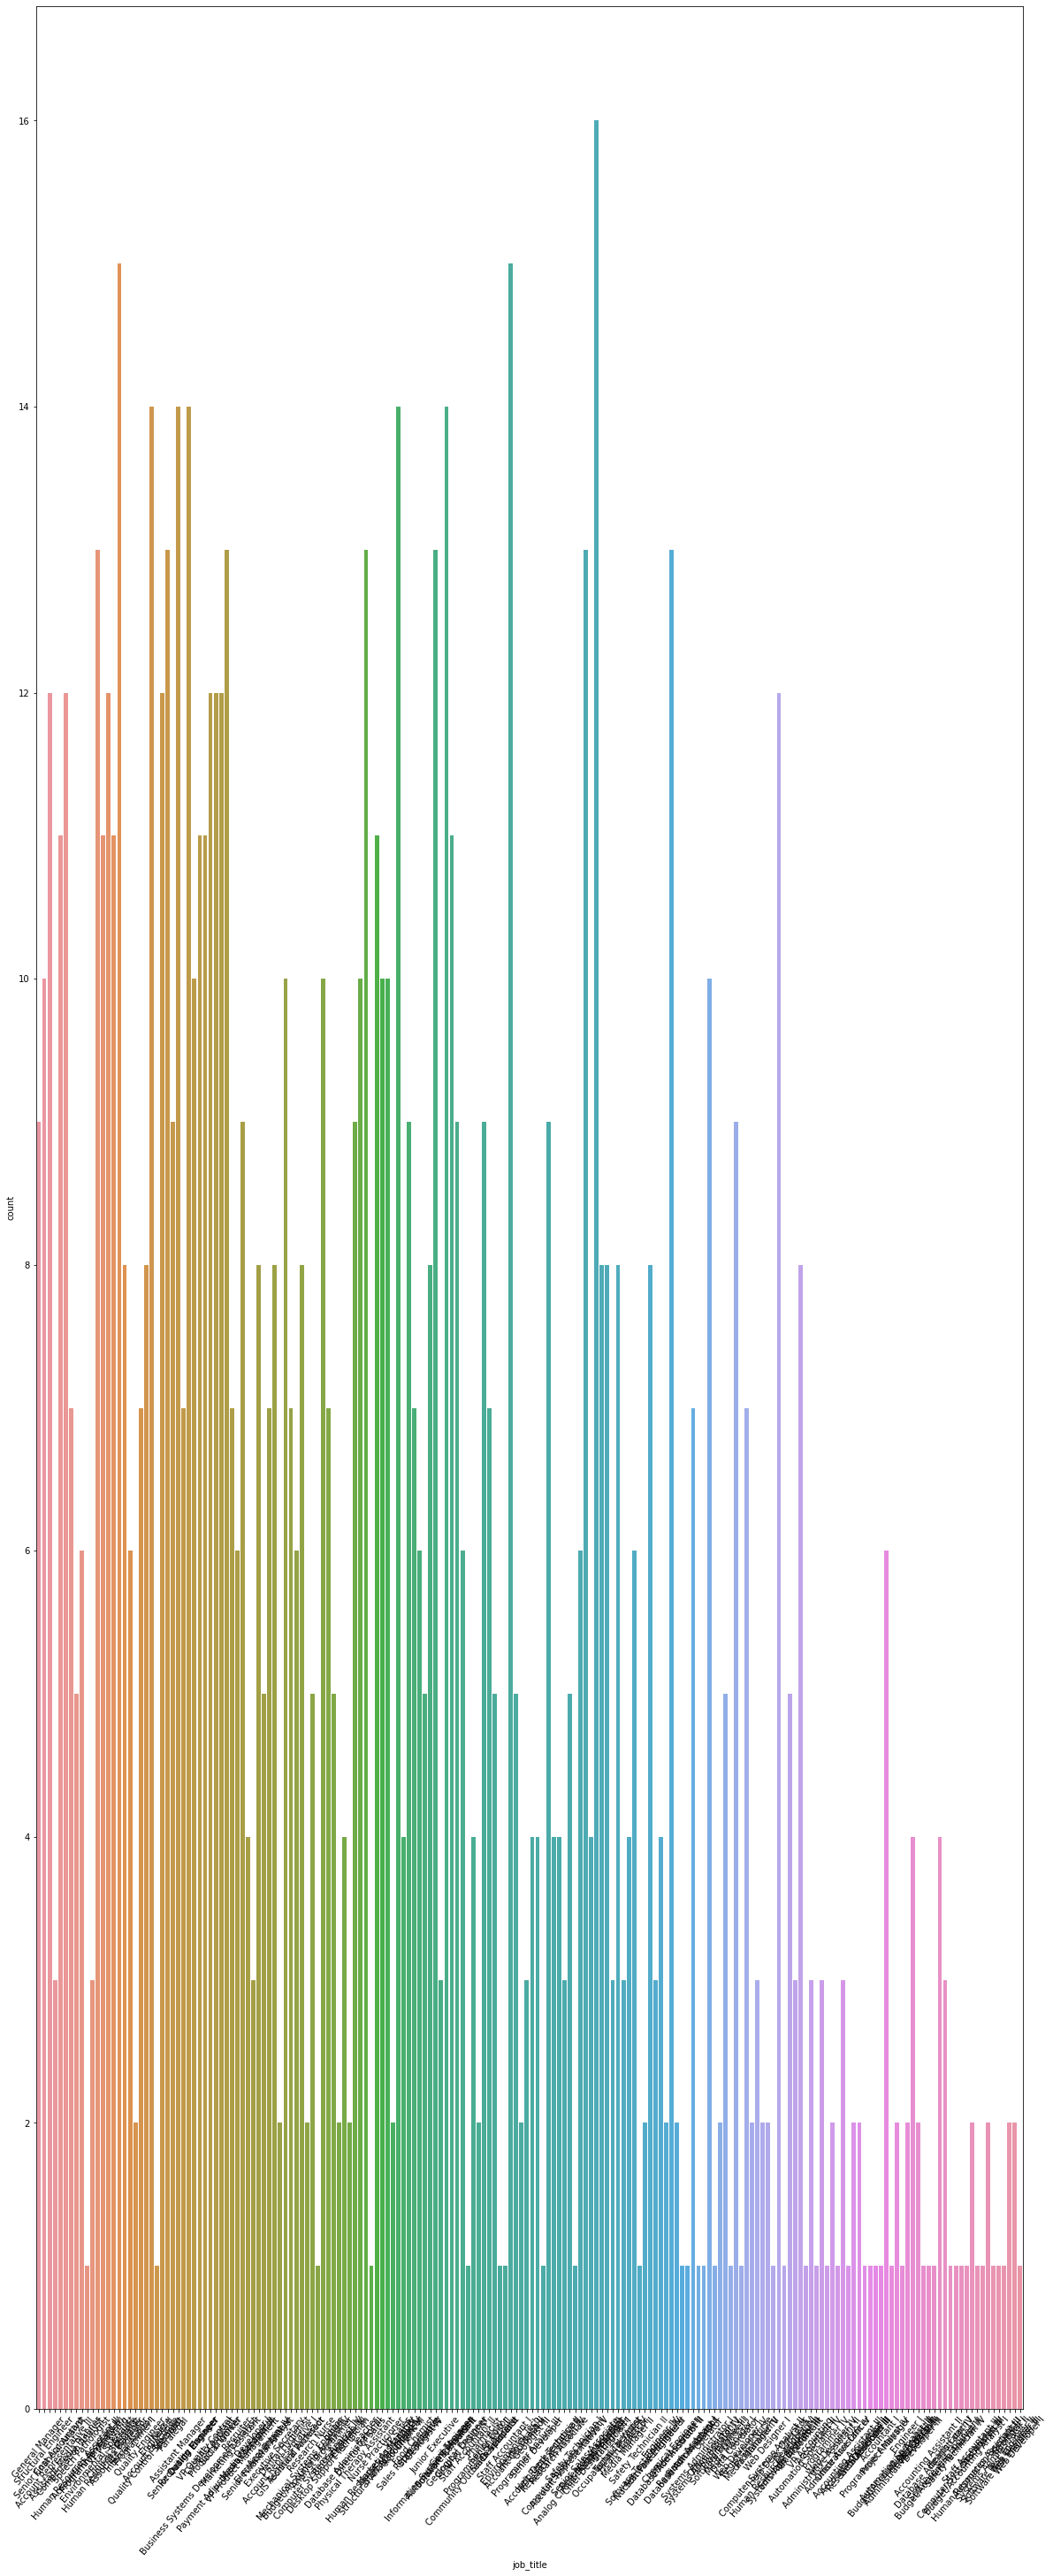

In [139]:
plt.figure(figsize=(20,50))

chart=sns.countplot(x='job_title',data=Data)
chart.set_xticklabels(chart.get_xticklabels(),rotation=50)
plt.show()



<AxesSubplot:xlabel='state', ylabel='past_3_years_bike_related_purchases'>

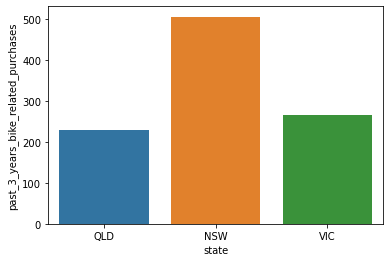

In [140]:
sns.barplot(x='state',y='past_3_years_bike_related_purchases',data=Data,estimator=len)